In [81]:
import pylab as pl
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# import sklearn.cross_validation as skcross
%pylab inline --no-import-all
from random import randint

np.set_printoptions(precision=5, suppress=True)



Populating the interactive namespace from numpy and matplotlib


In [91]:
gradient = 2
offset   = 10
point_num = 100
train_num = 50000

In [92]:
count = 20
x1 = np.linspace(1, 5, count)
# range(*x1.shape)
x2 = gradient*x1 + np.random.randint(-10,10,x1.shape[0])+offset
print(x2.shape)
print(x2)

(20,)
[ 7.       4.42105  6.84211  3.26316  8.68421 17.10526  7.52632  9.94737
 22.36842 17.78947 25.21053 25.63158 20.05263  9.47368 18.89474 25.31579
 17.73684 19.15789 16.57895 16.     ]


In [93]:
def GenerateRandomData(count, gradient, offset):
    x1 = np.linspace(1, 5, count)
    x2 = gradient*x1 + np.random.randint(-10,10,x1.shape[0])+offset
    dataset = []
    result = []
    for i in range(*x1.shape):
        dataset.append([x1[i], x2[i]])
        real_value = gradient*x1[i]+offset
        if real_value > x2[i]:
            result.append(-1)
        else:
            result.append(1)
    return x1,x2,np.array(result),np.array(dataset)

x, y, result, train_data = GenerateRandomData(point_num, gradient, offset)
x_t, y_t, test_real_result, test_data =  GenerateRandomData(100, gradient, offset)

print('shape and type of x\n',np.shape(x),type(x))
print('shape and type of y\n',np.shape(y),type(y))
print('result\n',np.shape(result),type(result))
print('train_data\n',np.shape(train_data),type(train_data))

shape and type of x
 (100,) <class 'numpy.ndarray'>
shape and type of y
 (100,) <class 'numpy.ndarray'>
result
 (100,) <class 'numpy.ndarray'>
train_data
 (100, 2) <class 'numpy.ndarray'>


In [94]:
print('x\n',x)
print('y\n',y)
print('result\n',result)
print('train_data\n',train_data)

x
 [1.      1.0404  1.08081 1.12121 1.16162 1.20202 1.24242 1.28283 1.32323
 1.36364 1.40404 1.44444 1.48485 1.52525 1.56566 1.60606 1.64646 1.68687
 1.72727 1.76768 1.80808 1.84848 1.88889 1.92929 1.9697  2.0101  2.05051
 2.09091 2.13131 2.17172 2.21212 2.25253 2.29293 2.33333 2.37374 2.41414
 2.45455 2.49495 2.53535 2.57576 2.61616 2.65657 2.69697 2.73737 2.77778
 2.81818 2.85859 2.89899 2.93939 2.9798  3.0202  3.06061 3.10101 3.14141
 3.18182 3.22222 3.26263 3.30303 3.34343 3.38384 3.42424 3.46465 3.50505
 3.54545 3.58586 3.62626 3.66667 3.70707 3.74747 3.78788 3.82828 3.86869
 3.90909 3.94949 3.9899  4.0303  4.07071 4.11111 4.15152 4.19192 4.23232
 4.27273 4.31313 4.35354 4.39394 4.43434 4.47475 4.51515 4.55556 4.59596
 4.63636 4.67677 4.71717 4.75758 4.79798 4.83838 4.87879 4.91919 4.9596
 5.     ]
y
 [ 2.       2.08081 17.16162 11.24242 14.32323  9.40404  7.48485  4.56566
 17.64646  9.72727  4.80808  6.88889  2.9697  12.05051 16.13131 13.21212
 14.29293  3.37374 22.45455  6.53535

In [95]:
def pos_neg_point(x,y,result):
    pos_x = []
    pos_y = []
    neg_x = []
    neg_y = []
#     result = result.squeeze()
#     print(result)
    for i in range(len(result)):
        if result[i]==-1:
            neg_x.append(x[i])
            neg_y.append(y[i])
        else:
            pos_x.append(x[i])
            pos_y.append(y[i])
    return pos_x,pos_y,neg_x,neg_y

pos_x,pos_y,neg_x,neg_y = pos_neg_point(x,y,result)        

In [96]:
class SimplePerceptron:
    # eta means the learning rate
    def __init__(self, train_data = [], real_result = [], eta = 1):
        self.w   =   np.zeros([1, train_data.shape[1]], int)
        self.b   =   0
        self.eta =   eta
        self.train_data   = train_data
        self.real_result  = real_result
   
    def nomalize(self, x):
        if x > 0 :
            return 1
        else :
            return -1
    
    def model(self, x):
        # Here are matrix dot multiply get one value
        y = np.dot(x, self.w.T) + self.b
#         print('value of y\n',y)
        # Use sign to nomalize the result
        predict_v = self.nomalize(y)
#         print('value of predict_v',predict_v)
        return predict_v, y
    
    def update(self, x, y):
        # w = w + n*y_i*x_i
        self.w = self.w + self.eta*y*x
        # b = b + n*y_i
        self.b = self.b + self.eta*y
    
    def loss(slef, fx, y):
        return fx.astype(int)*y

    def train(self, count):
        update_count = 0
        while count > 0:
            # count--
            count = count - 1
            if train_data.shape[0] <= 0:
                print("exception exit")
                break
            # random select one train data
            index = randint(0, train_data.shape[0]-1)
            x = self.train_data[index]
            y = self.real_result.T[index]
            # wx+b
            predict_v, linear_y_v = self.model(x)
            # y_i*(wx+b) > 0, the classify is correct, else it is wrong
            if self.loss(y, linear_y_v) > 0:
                continue
            update_count = update_count + 1
            self.update(x, y)
        print("update count: ", update_count)
        pass
    
    def verify(self, verify_data, verify_result):
        size = verify_data.shape[0]
        failed_count = 0
        if size <= 0:
            pass
        for i in range(size):
            x = verify_data[i]
            y = verify_result.T[i]
            if self.loss(y, self.model(x)[1]) > 0:
                continue
            failed_count = failed_count + 1
        success_rate = (1.0 - (float(failed_count)/size))*100
        print("Success Rate: ", success_rate, "%")
        print("All input: ", size, " failed_count: ", failed_count)

    def predict(self, predict_data):
        size = len(predict_data)
        result = []
        if size <= 0:
            pass
        for i in range(size):
            x = verify_data[i]
            y = verify_result.T[i]
            result.append(self.model(x)[0])
        return result

In [97]:
perceptron = SimplePerceptron(train_data, result)
perceptron.train(train_num)
perceptron.verify(test_data, test_real_result)
print("T1: w:", perceptron.w," b:", perceptron.b)

update count:  2485
Success Rate:  100.0 %
All input:  100  failed_count:  0
T1: w: [[-128.25253   56.49495]]  b: -499


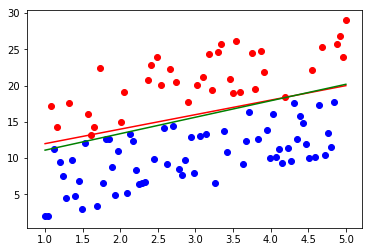

In [98]:
# Draw the figure
# 1. draw the (x,y) points
plt.scatter(pos_x, pos_y,color='red')
plt.scatter(neg_x, neg_y,color='blue')
# plt.plot(x_t, y_t, "+")
# 2. draw y=gradient*x+offset line
plt.plot(x,x.dot(gradient)+offset, color="red")
# 3. draw the line w_1*x_1 + w_2*x_2 + b = 0
plt.plot(x, -(x.dot(float(perceptron.w.T[0]))+float(perceptron.b))/float(perceptron.w.T[1])
         , color='green')
plt.show()

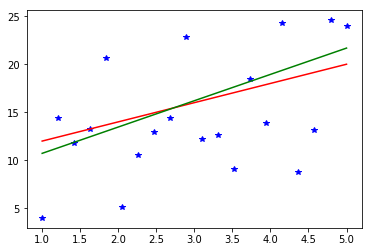

In [33]:
# Draw the figure
# 1. draw the (x,y) points
plt.plot(x, y, "*", color='blue')
# plt.plot(x_t, y_t, "+")
# 2. draw y=gradient*x+offset line
plt.plot(x,x.dot(gradient)+offset, color="red")
# 3. draw the line w_1*x_1 + w_2*x_2 + b = 0
plt.plot(x, -(x.dot(float(perceptron.w.T[0]))+float(perceptron.b))/float(perceptron.w.T[1])
         , color='green')
plt.show()

In [ ]:
pl.scatter(train_data[y==0, 0], X[y==0, 1], c='r')

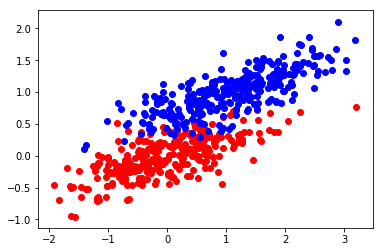

In [6]:
pl.scatter(X[y==0, 0], X[y==0, 1], c='r')
pl.scatter(X[y==1, 0], X[y==1, 1], c='b')

In [ ]:
# activation functions
def sign(X):
    if X > 0:
        return 1